In [1]:
%reload_ext autoreload
%autoreload 2
from IPython import parallel

/home/jlevyabi/anaconda3/lib/python3.6/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
from IPython import parallel
client = parallel.Client()
lbv = client.load_balanced_view()
dview = client[:]
dview

<DirectView [0, 1, 2, 3,...]>

In [ ]:
%px cd /home/jlevyabi/seacabo/fempl_big_sim/sent_class/Markov_Chains
%px from Perceptron import PerceptronMCMC
%px from Perceptron import PerceptronSA
%px import numpy as np

# __Parameters__

In [4]:
nb_dimensions=50
maximal_nb_iters=1000
number_simulations=100

# MCMC

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from Perceptron import PerceptronMCMC
# First Simulation
a,b=1,0.5
my_perceptron=PerceptronMCMC(n_dim=nb_dimensions,alpha=a,beta=b)
All_W1,All_E1=my_perceptron.avg_simul(maximal_nb_iters,number_simulations)

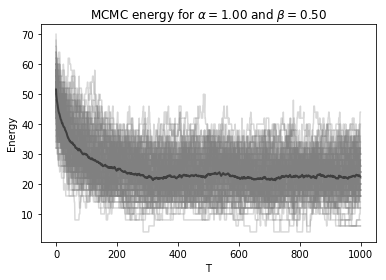

In [6]:
for E_simu in All_E1:
    plt.plot(range(len(E_simu)),E_simu,alpha=0.3,color="grey")
plt.plot(range(maximal_nb_iters),np.mean(All_E1,axis=0),alpha=0.5,color="k",lw=2)
plt.xlabel('T')
plt.ylabel('Energy')
plt.title(r"MCMC energy for $\alpha=%.2f$ and $\beta=%.2f$"%(a,b))
plt.show()

In [5]:
nb_dimensions=100
maximal_nb_iters=3000
number_simulations=120

In [25]:
from Perceptron import PerceptronMCMC
import numpy as np
beta0=0.5#np.random.uniform(low=0.5, high=5, size=1)[0]
wr=0#(my_perceptron.w_real).tolist()
alphas=np.linspace(start=0.5,stop=10,num=300)
def evaluate(alp,bet=beta0,nb_dimensions=nb_dimensions,maximal_nb_iters=maximal_nb_iters,
             number_simulations=number_simulations,w_real=wr):
    w_real=np.array(w_real)
    perc=PerceptronMCMC(n_dim=nb_dimensions,alpha=alp,beta=bet,w_real=None)
    return perc,perc.avg_simul(max_iter=maximal_nb_iters,nb_simulations=number_simulations)

In [26]:
parallel_result1 = dview.map_sync(evaluate,alphas)

In [27]:
data_per_alpha={}
from tqdm import tqdm
for alpha,full_res in tqdm(zip(alphas, parallel_result1)):
    perc_res,stat_res=full_res
    A_W,A_E=stat_res
    data_per_alpha[alpha]={'perceptron':perc_res,'energy':A_E,'weights':A_W,
                           'final_weights':A_W[:,-1,:],
                           'final_ovp':(1.0/perc_res.n_dim)*np.dot(np.array(A_W)[:,-1,:],np.transpose(perc_res.w_real)).reshape((1,-1))[0],
                           'final_energy':(1.0/perc_res.nb_samples)*(A_E[:,-1])}

300it [01:16,  4.04it/s]


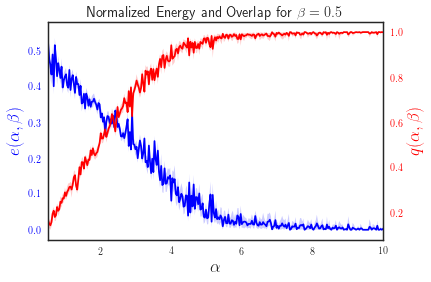

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
#plt.subplot(121)
plt.rc('text', usetex=True)
fig, ax1 = plt.subplots()
test_ovl=np.array([(1/vals['perceptron'].n_dim)*np.dot(
    vals['weights'][:,-1,:],np.transpose(vals['perceptron'].w_real)).reshape((1,-1))[0]
 for vals in data_per_alpha.values()])
test_enr=np.array([(1/vals['perceptron'].nb_samples)*vals['energy'][:,-1]  for vals in data_per_alpha.values()])
sns.tsplot(np.transpose(test_enr),estimator=np.mean,ci=99,color="blue",n_boot=100,ax=ax1,time=alphas)
ax2 = ax1.twinx()
ax1.set_ylabel(r'$e(\alpha,\beta)$',fontsize="xx-large")
sns.tsplot(np.transpose(test_ovl),estimator=np.mean,ci=99,color="red",n_boot=100,ax=ax2,time=alphas)
ax2.set_ylabel(r'$q(\alpha,\beta)$',fontsize="xx-large")
ax1.set_xlabel(r'$\alpha$',fontsize="xx-large")
ax1.yaxis.label.set_color('blue')
ax2.yaxis.label.set_color('red')

plt.title(r'Normalized Energy and Overlap for $\beta=0.5$',fontsize="x-large")

def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None

color_y_axis(ax1, 'b')
color_y_axis(ax2, 'r')
plt.savefig("mcmc_b_0p5.pdf")
plt.show()

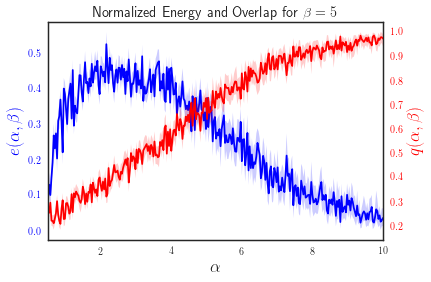

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
#plt.subplot(121)
plt.rc('text', usetex=True)
fig, ax1 = plt.subplots()
test_ovl=np.array([(1/vals['perceptron'].n_dim)*np.dot(
    vals['weights'][:,-1,:],np.transpose(vals['perceptron'].w_real)).reshape((1,-1))[0]
 for vals in data_per_alpha.values()])
test_enr=np.array([(1/vals['perceptron'].nb_samples)*vals['energy'][:,-1]  for vals in data_per_alpha.values()])
sns.tsplot(np.transpose(test_enr),estimator=np.mean,ci=99,color="blue",n_boot=100,ax=ax1,time=alphas)
ax2 = ax1.twinx()
ax1.set_ylabel(r'$e(\alpha,\beta)$',fontsize="xx-large")
sns.tsplot(np.transpose(test_ovl),estimator=np.mean,ci=99,color="red",n_boot=100,ax=ax2,time=alphas)
ax2.set_ylabel(r'$q(\alpha,\beta)$',fontsize="xx-large")
ax1.set_xlabel(r'$\alpha$',fontsize="xx-large")
ax1.yaxis.label.set_color('blue')
ax2.yaxis.label.set_color('red')

plt.title(r'Normalized Energy and Overlap for $\beta=5$',fontsize="x-large")

def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None

color_y_axis(ax1, 'b')
color_y_axis(ax2, 'r')
plt.savefig("mcmc_b_5.pdf")
plt.show()